## Example Gaussian Mixture Model (GMM) in Python<br>
<br>

**0) Loading Libraries**<br>
<br>

In [1]:
#standard libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
import warnings                                                   #sometimes GMM produces warnings which are not relevant
from sklearn.mixture import GaussianMixture                       #for performing actual GMM
from sklearn.metrics import silhouette_samples, silhouette_score  #calculating silhouette coefficient
from sklearn import datasets                                      #we want to work with an internal data set

<br>

**1) Loading and Inspecting the Data**<br>
<br>

In [5]:
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [7]:
Labels = iris.target_names
print(Labels)
X = iris.data
k = len(Labels)
print(X.shape)

['setosa' 'versicolor' 'virginica']
(150, 4)


<br>
Extracting numerical labels (target vector Y):

In [9]:
Y = iris.target
print(Y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


<br>

**2) Plotting the Data**<br>
<br>

The first 50 entries in the data refer to Setosa, the next 50 entries refer to Versicolour etc. The data set is 4D. For plotting purposes, let's take a look at two dimensions each:

In [11]:
X12 = X[:,0:2]
X23 = X[:,1:3]
X34 = X[:,2:]

Color = ["#1B9E77", "#D95F02", "#7570B3"]

a) first two coordinates:

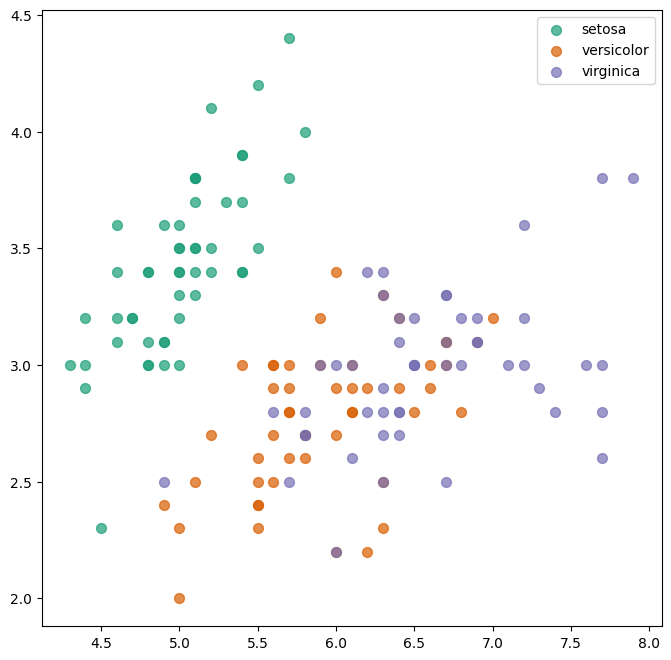

In [13]:
fig, ax = plt.subplots(figsize = (8,8))
i = 0
for species, color in zip(Labels, Color):
    idxs = np.arange(0,50) + 50*i
    i += 1
    ax.scatter(X12[idxs,0], X12[idxs,1], label = species, s = 50, color = color, alpha = 0.7)
ax.legend()
plt.show()

b) second and third coordinate:

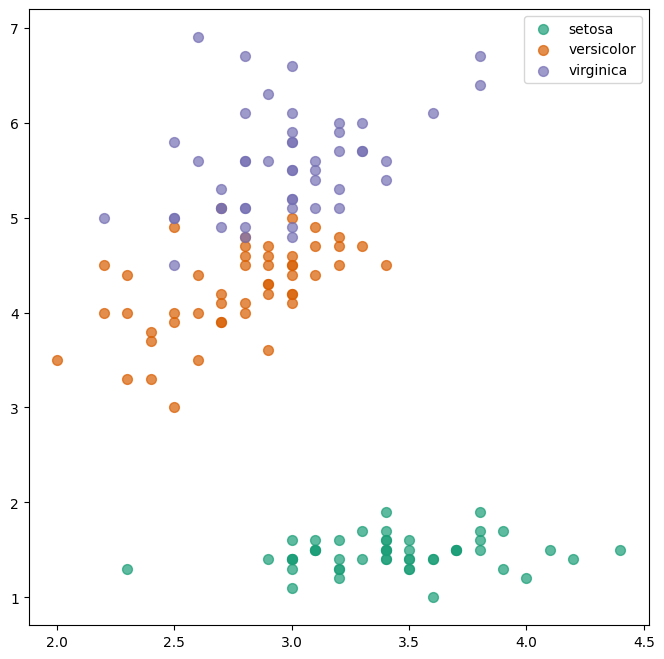

In [15]:
fig, ax = plt.subplots(figsize = (8,8))
i = 0
for species, color in zip(Labels, Color):
    idxs = np.arange(0,50) + 50*i
    i += 1
    ax.scatter(X23[idxs,0], X23[idxs,1], label = species, s = 50, color = color, alpha = 0.7)
ax.legend()
plt.show()

c) last two coordinates:

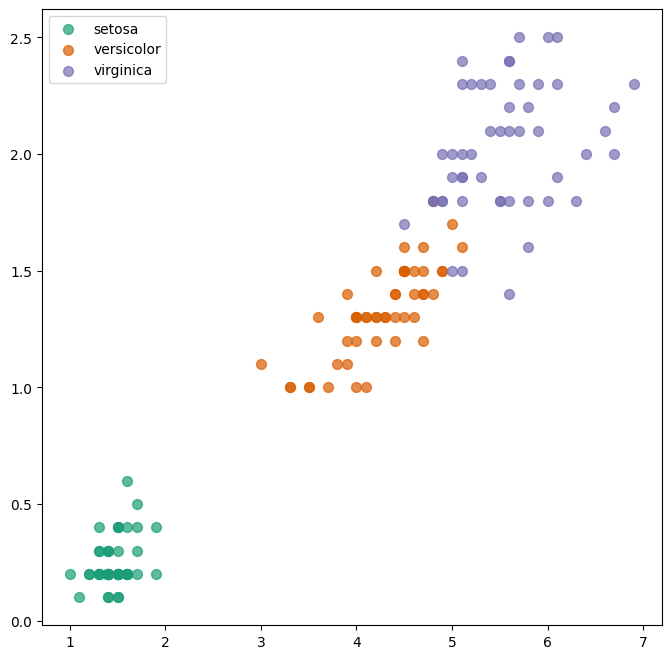

In [17]:
fig, ax = plt.subplots(figsize = (8,8))
i = 0
for species, color in zip(Labels, Color):
    idxs = np.arange(0,50) + 50*i
    i += 1
    ax.scatter(X34[idxs,0], X34[idxs,1], label = species, s = 50, color = color, alpha = 0.7)
ax.legend()
plt.show()

<br>

**3) Running GMM**<br>
<br>

a) This time, we start with the full 4D dataset, but we also want to evaluate the results using the 2D projections for plotting.

In [19]:
warnings.filterwarnings('ignore') #for ignoring warnings

my_model   = GaussianMixture(n_components = k, random_state = 0).fit(X) #data points are assgined randomly to intial gaussians
Center     = my_model.means_
PredLabels = my_model.predict(X)

The labels are assigned 0, 1, 2 since we don't know the true labels (unsupervised learning!)

In [21]:
print(PredLabels)#predicted vs true labels
print(Y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 0
 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Let us plot the centers (means) and compare their location to the data:

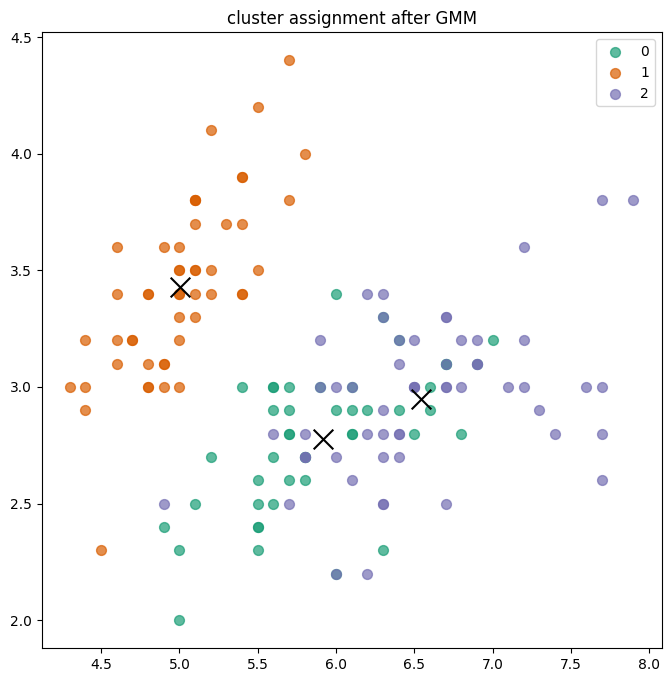

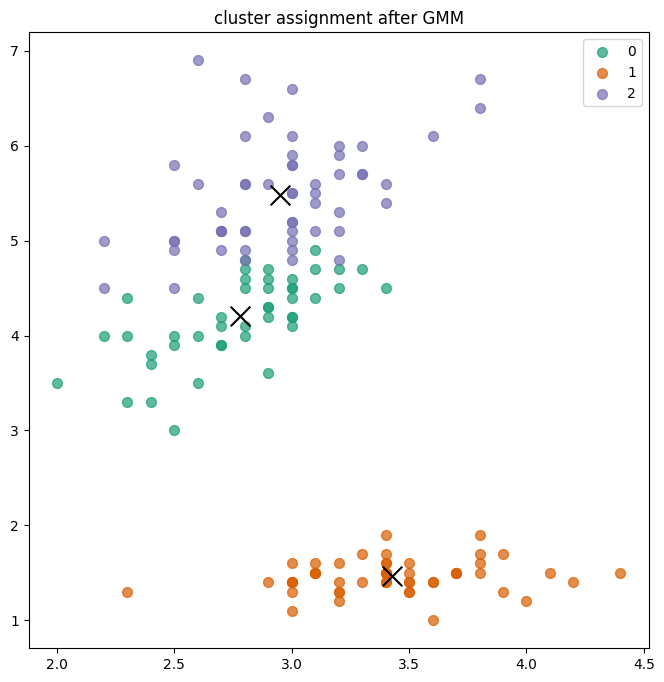

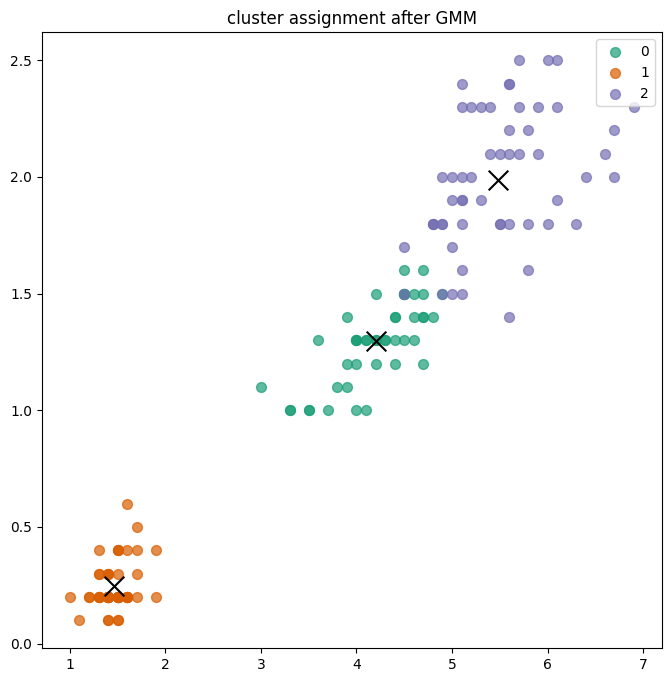

In [23]:
for i in range(3):
    X2D      = X[:,i:i+2]
    Center2D = Center[:,i:i+2]
    
    fig, ax = plt.subplots(figsize=(8,8))
    for species_pred, color in zip(np.unique(PredLabels), Color):
        idxs = np.where(np.array(PredLabels) == species_pred)
        ax.scatter(X2D[idxs,0], X2D[idxs,1], label = species_pred,\
               s = 50, color = color, alpha = 0.7)
    ax.legend()
    ax.scatter(Center2D[:,0],Center2D[:,1], marker = 'x', s = 200,\
               color = 'k')
    plt.title('cluster assignment after GMM')
    plt.show()

<br>
b) As with k-means, we want to calculate the silhoutte coefficient for different number of clusters and determin the accuracy for k = 3 cluster. 

In [25]:
Kmax = 15                 #calculate the silhouette coefficient for 2, 3, ... 15 cluster
S    = np.zeros((Kmax-1)) #preparing matrix for storing the result

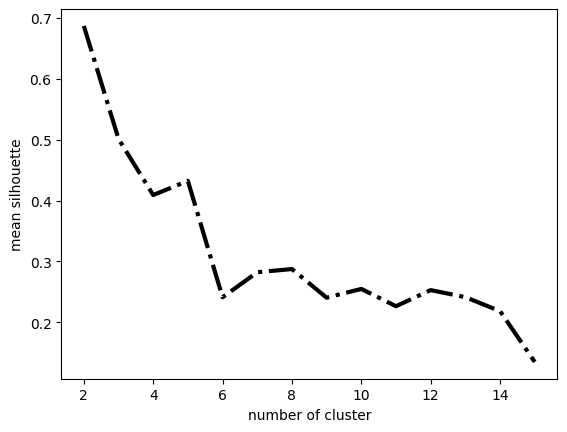


 accuracy for k = 3 is: 0.933%


In [27]:
for k in range(2, Kmax + 1):
        my_model = GaussianMixture(n_components = k, random_state = 0).fit(X)
        Labels   = my_model.predict(X)
        S[k-2]   = silhouette_score(X, Labels)#calculating the silhouette coefficient (1st entry for k=2, but index = 0)
        
        if k == 3:
            Labels = np.sort(Labels)
            diff0  = Labels[:50]    - 0
            diff1  = Labels[50:100] - 1
            diff2  = Labels[100:]   - 2
    
            diff    = np.vstack((diff0, diff1, diff2))
            idx     = np.array(np.where(diff==0))
            _, col  = idx.shape
            accur   = col/150
            
        
plt.plot(np.arange(2,Kmax+1), S, c = 'k', linestyle = '-.', linewidth = 3)
plt.xlabel('number of cluster')
plt.ylabel('mean silhouette')
plt.show()

print(f'\n accuracy for k = 3 is: {accur:.3f}%')

Again, the accuracy is high, but we obtain the best silhouette coefficient for k = 2.